In [ ]:
!pip install mastml

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
from mastml.mastml import Mastml
from mastml.datasets import SklearnDatasets
from mastml.preprocessing import SklearnPreprocessor
from mastml.models import SklearnModel
from mastml.data_splitters import SklearnDataSplitter
import matplotlib.pyplot as plt

In [ ]:
SAVEPATH = 'drive/MyDrive/ML4ER/Final_Project'

# the Mastml call here is initializing the Mastml object
mastml = Mastml(savepath=SAVEPATH)
# the get_savepath method generates the output folder specified above
savepath = mastml.get_savepath

drive/MyDrive/ML4ER/Final_Project not empty. Renaming...


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/ML4ER/adult.csv')


df['over 50k'] = df['income'].str.contains(">50K").astype(int)

df = df[['age', 'over 50k']]

#over = df[df['over 50k'] == 1]

#under = df[df['over 50k'] == 0]

df

,age,over 50k
0,90,0
1,82,0
2,66,0
3,54,0
4,41,0
...,...,...
32556,22,0
32557,27,0
32558,40,1
32559,58,0


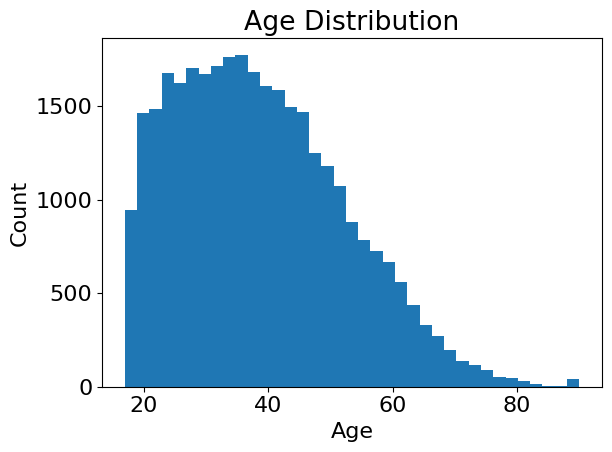

In [ ]:
plt.hist(df['age'], bins=37)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

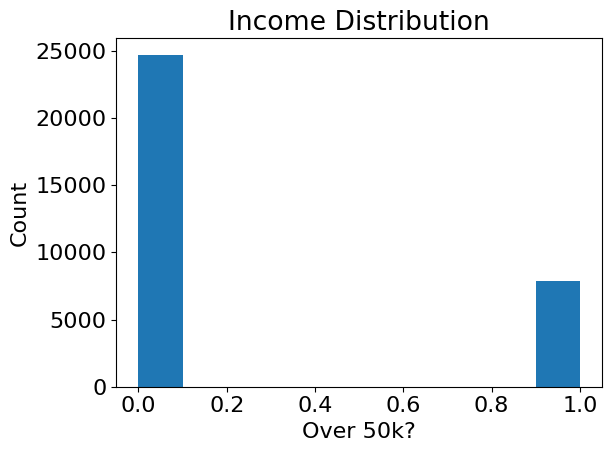

In [ ]:
plt.hist(df['over 50k'])
plt.xlabel('Over 50k?')
plt.ylabel('Count')
plt.title('Income Distribution')
plt.show()

In [252]:
from sklearn.preprocessing import StandardScaler
X = df.drop(columns=['over 50k'])
y = df['over 50k']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_val = scaler.transform(X_val)

#Making our model

In [253]:
import os
import shutil
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

import tensorflow
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from keras.optimizers import SGD, Adam

In [261]:
model_dense = Sequential()
model_dense.add(tensorflow.keras.Input(shape=(1,)))
model_dense.add(Dense(units=8, activation='relu'))
model_dense.add(Dense(units=4, activation='relu'))
model_dense.add(Dense(units=1, activation='sigmoid'))

In [262]:
model_dense.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_53 (Dense)                     │ (None, 8)                   │              16 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 57 (228.00 B)

 Trainable params: 57 (228.00 B)

 Non-trainable params: 0 (0.00 B)

compile the network, using the Adam optimizer and categorical crossentropy as a loss function,

In [263]:
model_dense.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

In [264]:
model_folder = 'dense_1layer'
checkpoint_file_fcn = os.path.join(SAVEPATH, model_folder,'checkpoint.model.keras')
earlyStopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, mode='max')
mcp_save = ModelCheckpoint(checkpoint_file_fcn, save_best_only=True, monitor='val_accuracy', mode='max')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=5, verbose=1, min_delta=1e-5, mode='max')

In [265]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)


class_weights_dict = {0: class_weights[0], 1: class_weights[1]}


history_dense = model_dense.fit(X_train,
                                y_train,
                                epochs=50,
                                verbose=1,
                                class_weight = class_weights_dict,
                                batch_size=16,
                                steps_per_epoch=None,
                                validation_data=(X_val, y_val),
                                callbacks=[earlyStopping, mcp_save, reduce_lr_loss])

Epoch 1/50
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.2415 - loss: 0.7708 - val_accuracy: 0.2349 - val_loss: 0.7309 - learning_rate: 1.0000e-04
Epoch 2/50
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.2828 - loss: 0.6829 - val_accuracy: 0.3577 - val_loss: 0.7160 - learning_rate: 1.0000e-04
Epoch 3/50
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.3700 - loss: 0.6856 - val_accuracy: 0.4335 - val_loss: 0.7161 - learning_rate: 1.0000e-04
Epoch 4/50
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4554 - loss: 0.6801 - val_accuracy: 0.5287 - val_loss: 0.7023 - learning_rate: 1.0000e-04
Epoch 5/50
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5115 - loss: 0.6761 - val_accuracy: 0.5137 - val_loss: 0.7113 - learning_rate: 1.0000e-04
Epoch 6/50
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5203 - loss: 0.6731 - val_accuracy: 0.5517 - val_loss: 0.7014 - learning_rate: 1.0000e-04
Epoch 7/50
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/st

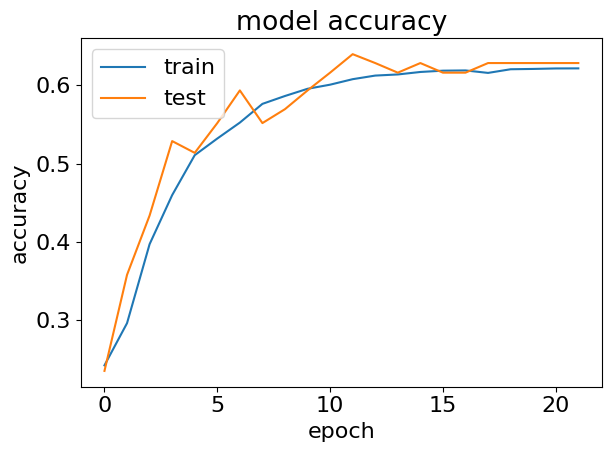

In [266]:
os.makedirs(model_folder, exist_ok=True)
plt.plot(history_dense.history['accuracy'])
plt.plot(history_dense.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(os.path.join(model_folder, 'model_dense_training.png'), dpi=300, bbox_inches='tight')
plt.show()

In [267]:
model_dense_best = keras.models.load_model(checkpoint_file_fcn)

preds = model_dense_best.predict(X_val)
y_true = y_val.values.ravel()
y_pred_dense = (preds > 0.5).astype(int).ravel()

model_dense_acc = accuracy_score(y_true, y_pred_dense)
print('Validation accuracy=', model_dense_acc)

p_r_f1 = precision_recall_fscore_support(y_true, y_pred_dense, labels=[0, 1])  # Changed labels
print('F1 scores:')
print('Average F1 score = ', np.mean([p_r_f1[2][0], p_r_f1[2][1]]))  # Adjusted for two labels

102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Validation accuracy= 0.6398526251151366
F1 scores:
Average F1 score =  0.5955457171395405
